# Grupparbete i flera delar – Lärarens upplaga

### Innehåll

* [Grupp 1](#ryhma1)
    * [Del 1: Transport av livsmedel](#osa1.1)
    * [Del 2: Utsläpp vid transport](#osa1.2)
    * [Del 3: Val av stad](#osa1.3)
* [Grupp 2 och 3](#ryhmat23)
    * [Del 1: Val av produkter och transportens inverkan](#osa2.1)
    * [Del 2: Utsläppens fördelning](#osa2.2)
* [Grupp 4](#ryhma4)

Med hjälp av detta grupparbete kan vi föreställa oss en vetenskaplig process, där flera självständiga grupper delar information för att nå fram till nya intressanta resultat. Idén bakom uppgiften är att eleverna ska delas in i 3-5 grupper, där varje grupp har sitt eget ansvarsområde och tidtabell för at utföra grupparbetet.

I grupparbetet kommer den första gruppen att förbereda de data som ligger till grund för de övriga gruppernas uppgifter. Om något fel uppkommer, så kommer naturligtvis felen att propagera från grupp till grupp, som i en omgång av "trasiga telefonen". Grupperna får några frågor som ska besvaras i en delrapport, som sedan, tillsammans med tillhörande diagram och information, skickas vidare till nästa grupp, som skriver en egen delrapport utgående från dessa. Den sista gruppens uppgift är att forma en slutrapport och presentera resultaten för alla elever som deltagit.

Varje grupp fungerar självständigt enligt sin grupps tidsschema. Grupperna kan hitta på ett namn för sin forskningsgrupp, vilket underlättar hänvisningar i rapporterna. 

Jokainen ryhmä toimii itsenäisesti ryhmäkohtaisen aikataulunsa mukaan. Ryhmät voivat keksiä omalle tutkimusryhmälleen nimen, jonka lisäksi tulisi sopia myös siitä, miten heidän ryhmälle voidaan esittää tarvittaessa kysymyksiä. Tämä voidaan toteuttaa esimerkiksi viiden minuutin kysymystuokiolla tiettyjen oppituntien jälkeen, sähköpostitse jne. Ryhmiä myös kannustetaan esittämään ainakin yksi kysymys edeltävälle ryhmälle.

I detta dokument finns alla gruppers frågor samlade, för lärarens bruk. De enskilda gruppernas instruktioner hittas <a href="https://github.com/opendata-education/Maantiede/tree/main/materiaali/harjoitukset">här</a>.

## Grupp 1 <a class="anchor" id="ryhma1"></a>

I diskussionen kring klimatförändring och hushåll finns det en fråga som gång på gång dyker upp: Vilken inverkan har matens ursprung på de utsläpp som orsakas av vår näring? Hur mycket skiljer sig t.ex. utsläppen som orsakas av ett paket lokalproducerat nötkött och en mexikansk avocado? Härifrån börjar vår forskning!

Er uppgift är att ta reda på hur matens transport fördelas mellan olika transporttyper. Hur mycket mat transporteras i medeltal över hav, på landsväg, på järnväg och genom luften. Data som krävs för detta hittas i filen "food_miles_by_method.csv". Slutligen bör ni lämna in en rapport, som innehåller de relevanta diagrammen och förklaringar till dem, samt svar på frågorna i slutet av den här uppgiftsbeskrivningen.


### Del 1: Transport av livsmedel <a class="anchor" id="osa1.1"></a>

In [1]:
# Vi börjar med att läsa in funktionspaketen som behövs för att skapa diagram.

import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Vi läser in datafilen.

transport = pd.read_csv('https://raw.githubusercontent.com/opendata-education/Maantiede/main/materiaali/data/food_miles_by_method.csv')

In [3]:
# Vi tar en titt på datan. Den här tabellen är liten, så vi kan se hela innehållet med kommandot .head()

transport.head()

,Kulkuvayla,Vuosi,Osuus,Paastot
0,Ilma,2010,0.16,1.13
1,Rautatie,2010,9.90,0.05
2,Maantie,2010,30.97,0.20
3,Vesi,2010,58.97,0.10


Vi stannar upp här och granskar tabellen. Den är på finska, men det är förhoppningsvis inte ett problem.

Tabellens kolumner är
- "Kulkuväylä" = Transportmetod - Luft/järnväg/landsväg/sjöfart
- "Vuosi" = Årtal för undersökningen
- "Osuus" = Andel av matens transport (Poore & Nemecek 2018)
- "Paastot" = Transportmetodens medelutsläpp utan temperaturreglering (kgCO2eq per tonne-kilometer) (Poore & Nemecek 2018)

Vilken information får ni ur tabellen? Vad innebär enheten koldioxidekvivalent? Vad menas med "per tonne-kilometer"? Vad innebär "utan temperaturreglering"? Varifrån kommer informationen?

När dessa frågor är utredda kan vi börja skapa diagram för att visualisera tabellen.

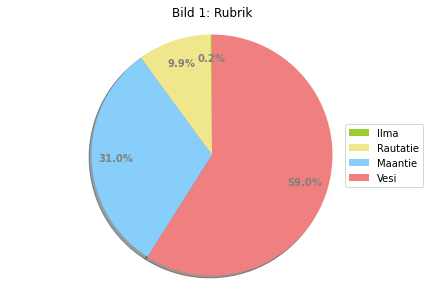

In [4]:
metoder = transport['Kulkuvayla'] # Vi sparar listan med transportmetoderna som en variabel. Vi kallar den "metoder"
andelar = transport['Osuus'] # Vi sparar listan med andelar som en annan variabel, "andelar"

# Vi väljer diagramets färger. Ni kan ändra färgerna själva.
# Listan måste innehålla 4 färger för att matcha de andra listorna som innehåller 4 värden.
colors = ['yellowgreen', 'khaki', 'lightskyblue', 'lightcoral'] 

# Vi skapar ett cirkeldiagram med kommandot plt.pie(). Vi anger variabeln "andelar", så att värdena tas därifrån.
patches, texts, pcts = plt.pie(andelar, colors=colors, autopct='%.1f%%', pctdistance=0.8, shadow=True, startangle=90)

# Vi skapar en 'legend' - en referensruta. Vi anger variabeln "metoder", så att namnen tas därifrån.
plt.legend(patches, metoder, bbox_to_anchor=(1,0.5), loc="center right", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.gca().axis("equal")
plt.setp(pcts, color='grey', fontweight='bold')
plt.tight_layout()

plt.title ("Bild 1: Rubrik") # Lägg till en passande rubrik. Vad beskriver diagrammet kort och tydligt?
plt.show()

### Del 2: Utsläpp vid transport <a class="anchor" id="osa1.2"></a>

Vi ska också sapa ett diagram över de olika transportsättens utsläpp, så att vi kan jämföra dem bättre.

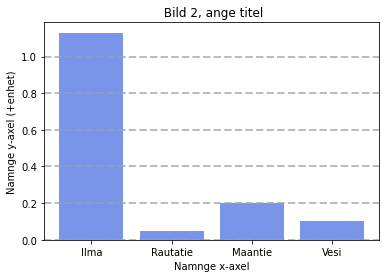

In [5]:
utslapp = transport['Paastot']
# paastot.head() # ta bort #-tecknet för att se vad listan innehåller.

plt.bar(metoder, utslapp, color='royalblue', alpha=0.7)
# Vi har redan en lista med transportmetodernas namn från den förra cellen.

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

# Namnge koordinataxlarna
plt.xlabel('Namnge x-axel') 
plt.ylabel('Namnge y-axel (+enhet)')

# Ange en passande, beskrivande rubrik.
plt.title(' Bild 2, ange titel') 
plt.show()

Vad berättar de diagram som ni har skapat? Hurudana tankar väcker de? I vilka situationer lönar sig de olika transportsätten? I vilka situationer är de inte lönsamma? Borde man överge någon av transportformerna, eller har alla sin plats?

### Del 3: Val av stad <a class="anchor" id="osa1.3"></a>

Välj, inom er grupp, tre städer spridda över Världen, och bestäm deras avstånd till Helsingfors (eller närmsta stad där ni befinner er).

In [6]:
# I denna cell anger vi information för att skapa en tabell.
# Ersätt "stad 1" med er första utvalda stad och så vidare, tills ni har fyllt tabellen.
# Ta reda på avstånden och fyll i dem. Kom ihåg att ange enhet för avståndet.

# Tabellens värden finns hädanefter som variabeln "info1".
info1 = {'Stad' : ['Stad 1', 'Stad 2', 'Stad 3', ],  
        'Avstånd till Helsingfors (+enhet)' : ['Avstånd 1', 'Avstånd 2', 'Avstånd 3']}

tabell1 = pd.DataFrame(info1)
display(tabell1) # Vi skriver ut tabellen

,Stad,Avstånd till Helsingfors (+enhet)
0,Stad 1,Avstånd 1
1,Stad 2,Avstånd 2
2,Stad 3,Avstånd 3


Fint! Nu har vi all grafik som hör till rapporten. Till sist behöver ni skriva rapporten. Den bör innehålla:

1. Diagrammen, med tydliga förklaringar och bildtexter.
1. Era observationer från graferna.
1. Svar på frågorna nedan
1. Kontaktuppgifter till er grupp i det fall att nästa grupp har följdfrågor.

Det är viktigt att skriva en noggrann rapport, så att nästa grupp får tillräckligt med information om ert arbete, kort och koncist. Gå alltså noga igenom er rapport själva, och tänk på vilka frågor som kan dyka upp när följande grupp läser den. Var förutseende, och svara på de potentiella frågorna innan de hinner ställas.

Frågor:
1. Vad betyder koldioxidekvivalent och tonne-kilometer? Vad innebär "utan temperaturreglering"?
1. Varifrån kommer tabellens information?
1. Fundera på vad era diagram berättar. Hurudana tankar väcker de? När kan det vara lönsamt att använda de olika transportmetoderna, och när lönar det sig inte? Borde man upphöra att använda någon av metoderna, eller fyller de alla en uppgift?
1. De siffror i tabellen som anger CO2-utsläppen vid transport är medeltal. Fundera på vilka faktorer som kan inverka. Vid vilka omständigheter kan talen vara större, vid vilka mindre? När är det väl befogat att använda medelvärden? När är det inte det?
1. Varför valde ni just dessa tre städer för närmare undersökning?

## Grupp 2 och 3 <a class="anchor" id="ryhmat23"></a>

I diskussionen kring klimatförändring och hushåll finns det en fråga som gång på gång dyker upp: Vilken inverkan har matens ursprung på de utsläpp som orsakas av vår näring? Hur mycket skiljer sig t.ex. utsläppen som orsakas av ett paket lokalproducerat nötkött och en mexikansk avocado? Härifrån börjar vår forskning!

Er uppgift är att bekanta er med den första gruppens rapport. Därifrån bör ni få den data och information som behövs för att ni ska kunna skapa era egna diagram. Därefter får ni bekanta er med den givna filen 'food-emissions-supply-chain.csv', som innehåller en lista på en del livsmedel och de utsläpp som kommer av dem.

Välj ett livsmedel (Grupp 2 kan välja ett vegetariskt och grupp 3 en köttprodukt), som ni undersöker närmare genom att jämföra t.ex. transportformens inverkan på produktens totalutsläpp, då produkten fraktas från de städer som grupp 1 valt till Helsingfors. Slutligen ska ni lämna in en rapport som innehåller de diagram som behövs, inklusive tillhörande förklaringar, och svar på frågorna nedan.

###  Del 1: Val av produkt och transportens inverkan <a class="anchor" id="osa2.1"></a>

In [7]:
# Eleverna börjar med att läsa in rätt funktionspaket.
# Vi läser in den givna csv-filen som variabeln livsmedel.

livsmedel = pd.read_csv('https://raw.githubusercontent.com/opendata-education/Maantiede/main/materiaali/data/food-emissions-supply-chain.csv')

In [8]:
# Denna cell visar oss hela csv-filens tabell.

pd.set_option("max_rows", None)
livsmedel

,Ruoka-aine,Koodi,Vuosi,Paastot maankaytosta,Paastot maanviljelysta,Paastot elaimen ruoasta,Paastot ruoan prosessoinnista,Paastot kuljetuksesta,Paastot jakelusta,Paastot pakkauksesta
0,Omenat,NaN,2018,0.0,0.2,0.0,0.0,0.1,0.0,0.0
1,Banaanit,NaN,2018,0.0,0.3,0.0,0.1,0.3,0.0,0.1
2,Ohra,NaN,2018,0.0,0.2,0.0,0.1,0.0,0.3,0.5
3,Nauta (lihakarja),NaN,2018,16.3,39.4,1.9,1.3,0.3,0.2,0.2
4,Nauta (maitotuotteet),NaN,2018,0.9,15.7,2.5,1.1,0.4,0.2,0.3
5,Sokerijuurikkaan sokeri,NaN,2018,0.0,0.5,0.0,0.2,0.6,0.0,0.1
6,Marjat ja rypaleet,NaN,2018,0.0,0.7,0.0,0.0,0.2,0.0,0.2
7,Kaalit,NaN,2018,0.0,0.3,0.0,0.0,0.1,0.0,0.0
8,Ruokosokeri,NaN,2018,1.2,0.5,0.0,0.0,0.8,0.0,0.1
9,Maniokki,NaN,2018,0.6,0.2,0.0,0.0,0.1,0.0,0.0


Nu när ni kan undersöka tabellens innehåll är det dags att välja ett intressant livsmedel att ta en närmare titt på. Därefter beräknar vi produktens CO2-utsläpp utan transportens inverkan, och sedan transportens andel av totalutsläppen.

Enheten som anges i tabellerna är kgCO2eq.

Exempel: Om CO2-utsläppen utan transportberäkning är 5 kgCO$_2$eq per kilogram, och frakt med tåg är 0.05 kgCO$_2$eq per ton och kilometer, så blir utsläppen för en produkt som fraktas 50 km totalt 5 kgCO$_2$eq + 0.05 kgCO$_2$eq  * 50 (km) / 1000 (kg) = 5.0025 kgCO$_2$eq per kilogram.


In [9]:
# Vi ska skapa en tabell som innehåller informationen om er utvalda livsmedelsprodukt, olika startstäder,
# transportsträckans längd och utsläpp vid olika transportmetoder. Ni kan börja med att köra den här cellen
# direkt utan att göra ändringar, så ser ni hur tabellen utformas innan ni börjar fylla i den.


info = {'Livsmedel' : ['x', 'x', 'x', 
                                    ],  
        'Startstad' : ['Stad 1', 'Stad 2', 'Stad 3'],  
        'Avstånd till Helsingfors' : ['avstånd', 'avstånd', 'avstånd'], 
        'Utsläpp 1 (enhet)' : ['tal 1.1', 'tal 1.2', 'tal 1.3'],
        'Utsläpp 2 (enhet)' : ['tal 2.1', 'tal 2.2', 'tal 2.3'],
        'Utsläpp 3 (enhet)' : ['tal 3.1', 'tal 3.2', 'tal 3.3'],
        'Utsläpp 4 (enhet)' : ['tal 4.1', 'tal 4.2', 'tal 4.3'],}

tabell = pd.DataFrame(info)
display(tabell)

,Livsmedel,Startstad,Avstånd till Helsingfors,Utsläpp 1 (enhet),Utsläpp 2 (enhet),Utsläpp 3 (enhet),Utsläpp 4 (enhet)
0,x,Stad 1,avstånd,tal 1.1,tal 2.1,tal 3.1,tal 4.1
1,x,Stad 2,avstånd,tal 1.2,tal 2.2,tal 3.2,tal 4.2
2,x,Stad 3,avstånd,tal 1.3,tal 2.3,tal 3.3,tal 4.3


Lägg märke till att utsläppen i livsmedelstabellen är beräknade per kilogram livsmedel, medan transportutsläppen är angivna per ton. Varför? När passar det bättre att räkna med kilogram och när passar det bättre att räkna i ton? Varför orsakar olika livsmedel olika stora transportutsläpp?

Här mäter vi utsläpp per massaenhet, men vilka andra storheter kunde vi använda när vi jämför utsläpp?

Fundera på hur era beräknade utsläpp stämmer överens med de som finns angivna i tabellen. Är det något av era resultat som stämmer överens med det angivna värdet? Vilken transportmetod används för maten i fråga? Varför? Hur viktig är transportutsläppens andel när man beräknar matens totalutsläpp?

### Del 2: Utsläppens fördelning <a class="anchor" id="osa2.2"></a>

Vi undersöker också utsläppens indelning enligt tabellen vi läste in i början.

In [12]:
# I den här cellen skapar vi de listor som behövs för att vi ska kunna
# visa hur utsläppen för vårt valda livsmedel är fördelade.


kategorier = livsmedel.columns # i 'kategorier'-variabeln sparar vi kolumnnamnen ur filen 'food-emissions-supply-chain.csv'
kategorier = kategorier[3:10] # Inom klamrarna kan vi välja vilka kolumner vi vill använda.
                              # [3:10] betyder 3 till 9, eftersom Python exkluderar den övre gränsen.
                              # t.ex. kolumn 3 = päästöt maankäytöstä osv.

print(kategorier) # Vi skriver ut listan för att kontrollera att vi fick med de rätta kolumnerna.

COvarden = livsmedel.loc[10] # Vi skapar en variabel för listan med livsmedlets utsläpp.
                            # Siffran inom klamrarna ska bytas ut mot ert valda livsmedels index. (omenat = 0, banaanit = 1...)

COvarden = COvarden[3:10] # Här väljer vi ut de värden ur listan som matchar våra valda kolumner.
print(COvarden)           # Vi skriver ut listan för att kontrollera att vi har valt rätt  värden.


summa = sum(COvarden) # Vi beräknar summan av alla värden för att använda den senare i koden.

andel = [i / summa for i in COvarden] # Vi beräknar varje värdes andel av matens totalutsläpp.

print(andel) # Vi skriver ut de beräknade andelarna av utsläppen.


Index(['Paastot maankaytosta', 'Paastot maanviljelysta',
       'Paastot elaimen ruoasta', 'Paastot ruoan prosessoinnista',
       'Paastot kuljetuksesta', 'Paastot jakelusta', 'Paastot pakkauksesta'],
      dtype='object')
Paastot maankaytosta              4.5
Paastot maanviljelysta           13.1
Paastot elaimen ruoasta           2.3
Paastot ruoan prosessoinnista     0.7
Paastot kuljetuksesta             0.1
Paastot jakelusta                 0.3
Paastot pakkauksesta              0.2
Name: 10, dtype: object
[0.2122641509433962, 0.6179245283018867, 0.10849056603773582, 0.033018867924528295, 0.0047169811320754715, 0.014150943396226412, 0.009433962264150943]


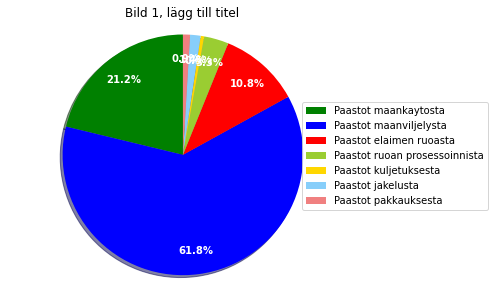

In [14]:
# Vi skapar ett diagram som avbildar de olika utsläppsområdenas andel av produktens totalutsläpp.

labels = kategorier
sizes = andel

colors = ['green','blue','red','yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] # Vi väljer färger för diagrammet.

# Följande stycke är en kod som skapar ett cirkeldiagram.
patches, texts, pcts = plt.pie(sizes, colors=colors, autopct='%.1f%%', pctdistance=0.8, shadow=True, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(1.15,0.5), loc="center right", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.gca().axis("equal")
plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()


plt.title ("Bild 1, lägg till titel") # Lägg till en passande rubrik till diagrammet. Vad avbildas här?

plt.show()

Fint! Nu har vi all grafik som hör till rapporten. Till sist behöver ni skriva rapporten. Den bör innehålla:

1. Diagrammen, med tydliga förklaringar och bildtexter.
1. Era observationer från graferna.
1. Svar på frågorna nedan
1. Kontaktuppgifter till er grupp i det fall att nästa grupp har följdfrågor.

Det är viktigt att skriva en noggrann rapport, så att nästa grupp får tillräckligt med information om ert arbete, kort och koncist. Gå alltså noga igenom er rapport själva, och tänk på vilka frågor som kan dyka upp när följande grupp läser den. Var förutseende, och svara på de potentiella frågorna innan de hinner ställas.

Frågor:
1. Varifrån kommer informationen i tabellerna och diagrammen?
1. Fundera på vad era diagram berättar. Hurudana tankar väcker de?
1. Hur är det med er valda livsmedelsprodukt? Var det något av era beräknade utsläppsvärden som träffade värdet i tabellen? Har transportmedlet en betydande inverkan på livsmedlets helhetsutsläpp? Hur stor inverkan har produktens ursprungsland? Vilka produktionsskeden påverkar produktens utsläpp?
1. Uppskatta hur tillförlitliga era beräkningar är. Verkar något av era resultat felaktigt? Kan ni motivera era resultat?
1. När är det mer praktiskt att ange utsläppen i kilogram, och när i ton? Hur kommer det sig att olika livsmedels transport orsakar olika stora utsläpp?

## Grupp 4 <a class="anchor" id="ryhma4"></a>

I diskussionen kring klimatförändring och hushåll finns det en fråga som gång på gång dyker upp: Vilken inverkan har matens ursprung på de utsläpp som orsakas av vår näring? Hur mycket skiljer sig t.ex. utsläppen som orsakas av ett paket lokalproducerat nötkött och en mexikansk avocado? Härifrån börjar vår forskning!

Uppdraget för er grupp är att bekanta er med de andra gruppernas skrivna rapporter och konstruera en sammanhängande helhet av dem. De andra grupperna har besvarat givna frågor, och ni kan använda deras svar. Om ni hittar på nya frågor, som rapporterna inte besvarar, kan de lämnas som öppna frågor i er sammanfattning. Det är bra att ge några frågor att fundera på när ni presenterar.

Er presentation behöver åtminstone innehålla följande saker:
1. Data gällande transportmedel, deras utsläpp och andra faktorer som påverkar transportutsläppen. Vilka fördelar och nackdelar har de olika transportmedlen? I hur stor utsträckning används de olika transportmedlen?
1. Förklara de olika givna enheterna och graferna.
1. Jämför de två givna livsmedlen med varandra. Vilka tankar väcks här? Har det någon betydelse om produkten hämtas fjärran eller nära? Med vilket transportmedel hämtas just de här produkterna? Varför? Vad är det som orsakar utsläppen, när produkten dyker upp i vår närbutik? Har dessa produkter olika stora utsläpp? Var grundar sig skillnaderna?
1. Är resultaten av beräkningarna logiska och välgrundade? Verkar rapportens slutresultat tillförlitliga?
1. Om man vill minimera utsläppen som orsakas av ens matval, vad ska man tänka på, enligt den här rapporten?

Presentera era slutresultat, funderingar och upptäckter på valfritt sätt.